In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_diabetes, load_linnerud, fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## iris

In [135]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [136]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [138]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

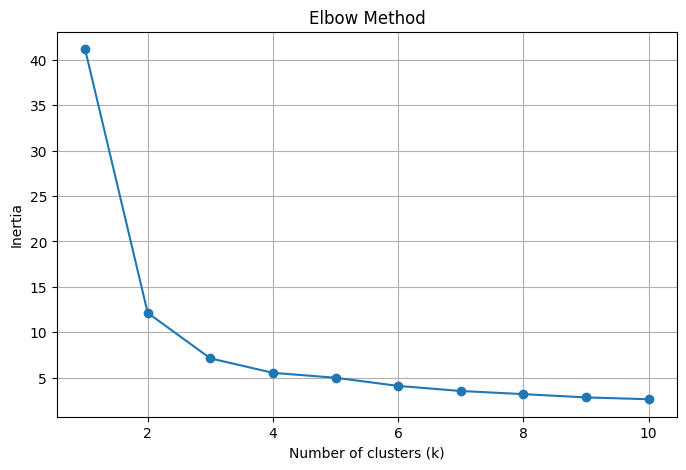

In [140]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [160]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [161]:
clusters = kmeans.predict(X_scaled)
X['cluster'] = clusters

In [162]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,1,-0.630703,0.107578
1,4.9,3.0,1.4,0.2,1,-0.622905,-0.104260
2,4.7,3.2,1.3,0.2,1,-0.669520,-0.051417
3,4.6,3.1,1.5,0.2,1,-0.654153,-0.102885
4,5.0,3.6,1.4,0.2,1,-0.648788,0.133488
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,0.551462,0.059841
146,6.3,2.5,5.0,1.9,0,0.407146,-0.171821
147,6.5,3.0,5.2,2.0,0,0.447143,0.037560
148,6.2,3.4,5.4,2.3,3,0.488208,0.149678


In [163]:
X.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pca1,pca2
cluster,,,,,,
0,6.278571,2.904762,4.909524,1.673810,0.308889,-0.020032
1,5.006000,3.428000,1.462000,0.246000,-0.618424,0.068585
2,5.600000,2.590323,4.041935,1.238710,0.040862,-0.207574
3,6.996296,3.144444,5.892593,2.181481,0.617820,0.142476


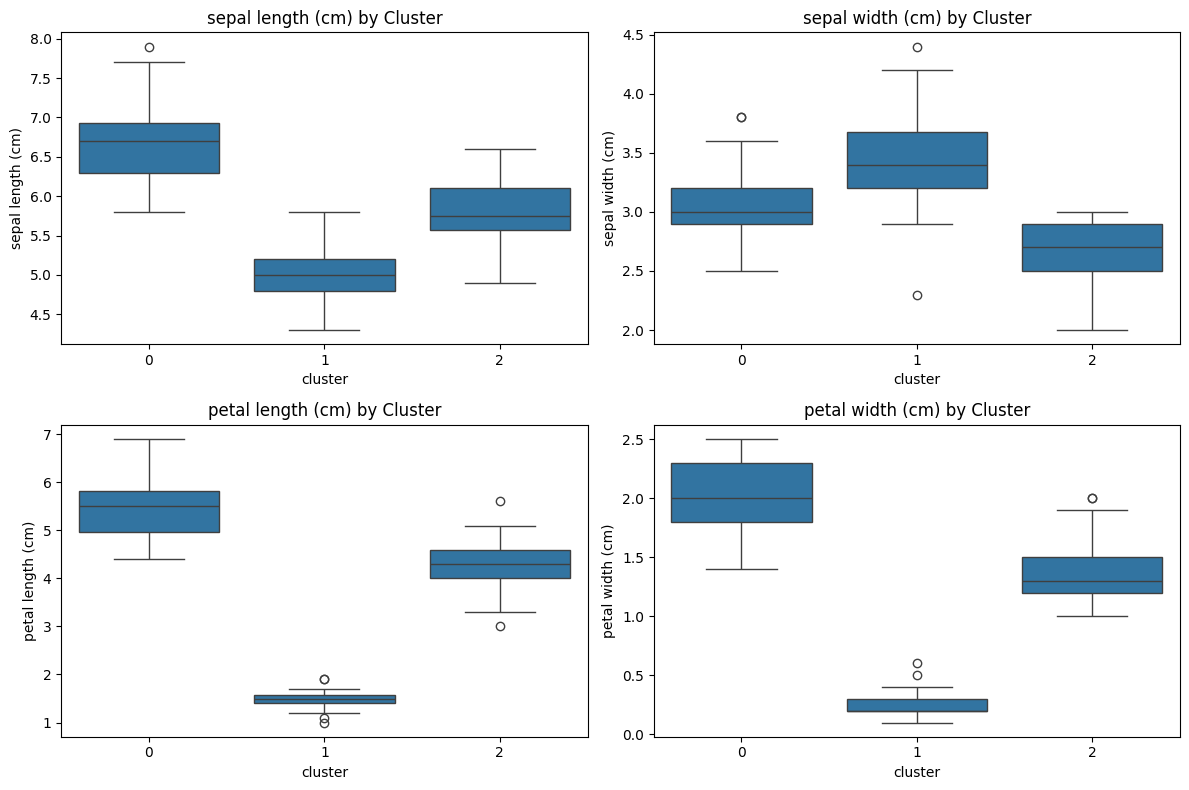

In [159]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

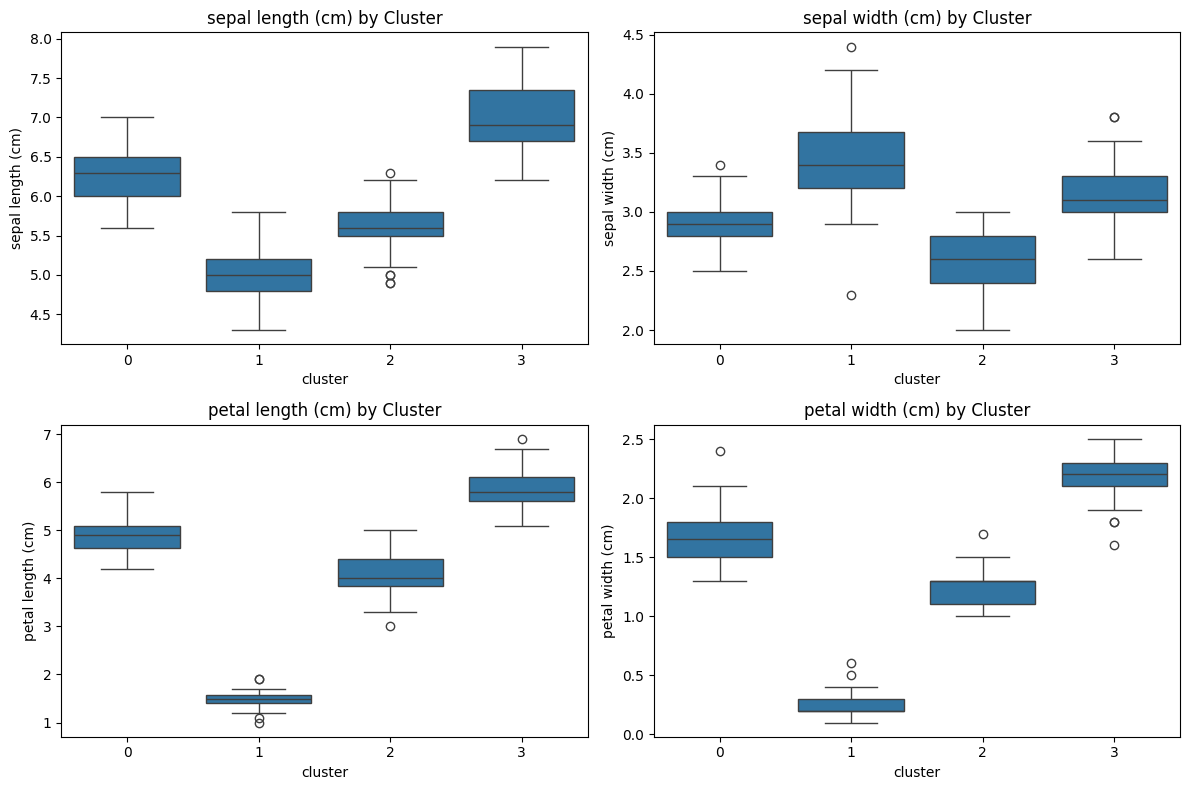

In [164]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

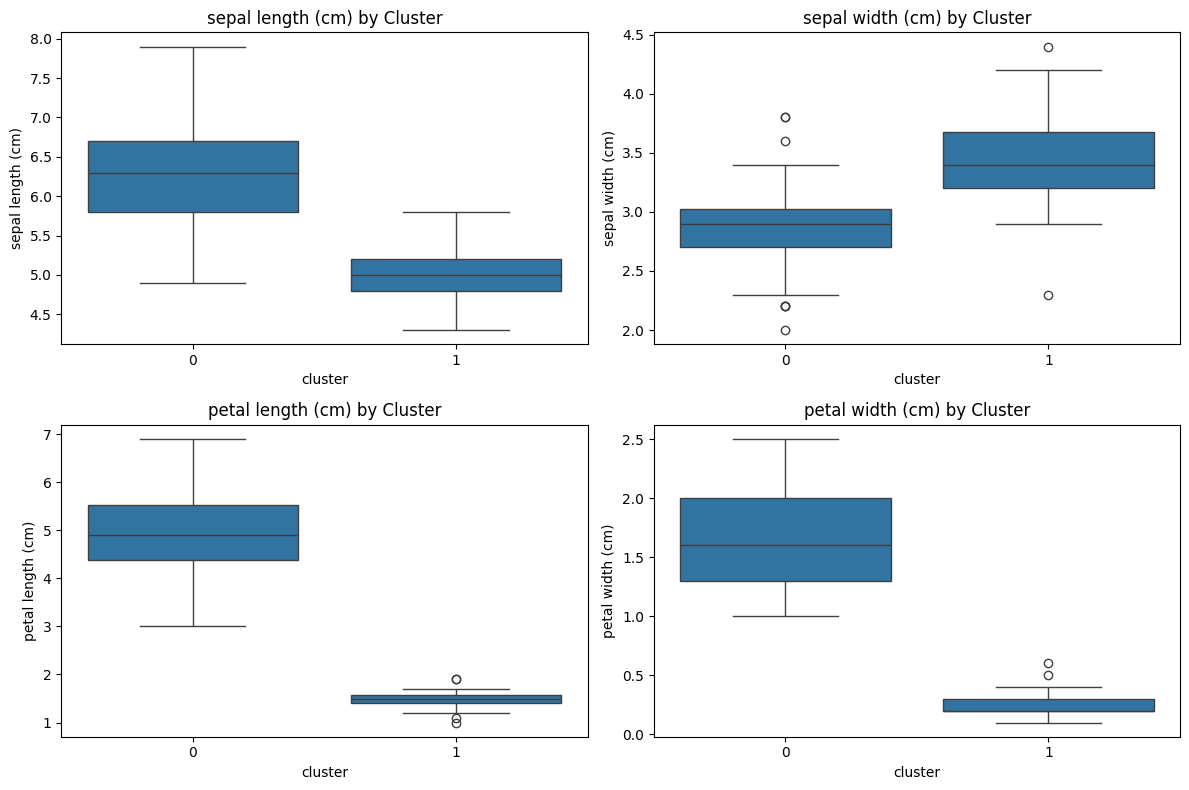

In [153]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

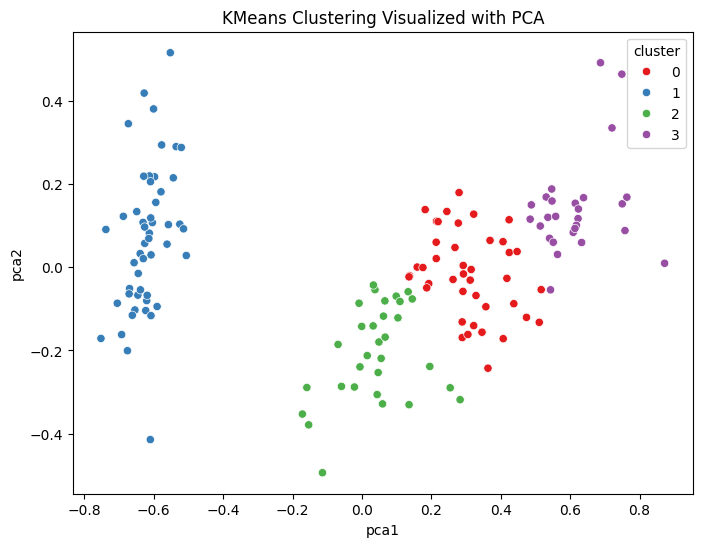

In [165]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster', palette='Set1')#, style=iris.target)
plt.title('KMeans Clustering Visualized with PCA')
plt.show()


## diabetes

In [183]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names).drop(columns="sex")

In [184]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [185]:
X

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [186]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

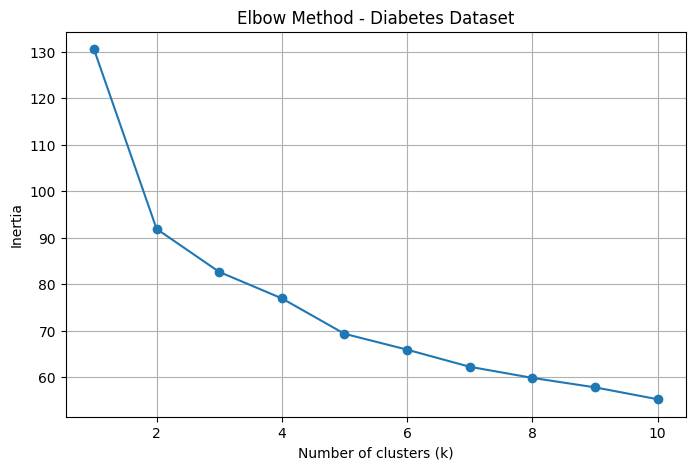

In [187]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Diabetes Dataset')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [188]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [189]:
clusters = kmeans.predict(X_scaled)
X['cluster'] = clusters

In [190]:
X.groupby('cluster').mean()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
cluster,,,,,,,,,
0,-0.021903,-0.024825,-0.024155,-0.025831,-0.026053,0.023536,-0.033490,-0.032635,-0.025988
1,0.020745,0.023512,0.022878,0.024465,0.024675,-0.022292,0.031719,0.030910,0.024614


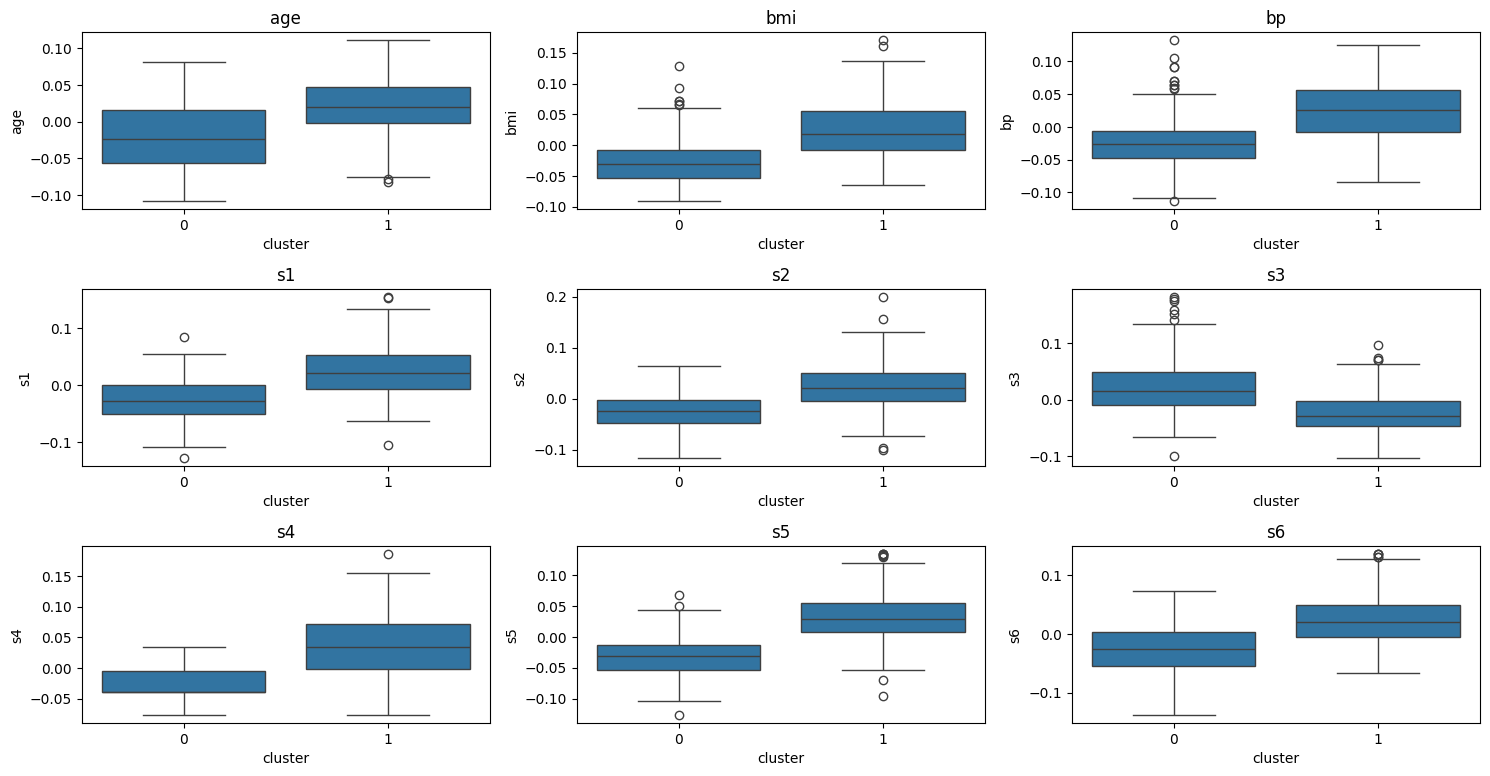

In [191]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(column)
plt.tight_layout()
plt.show()

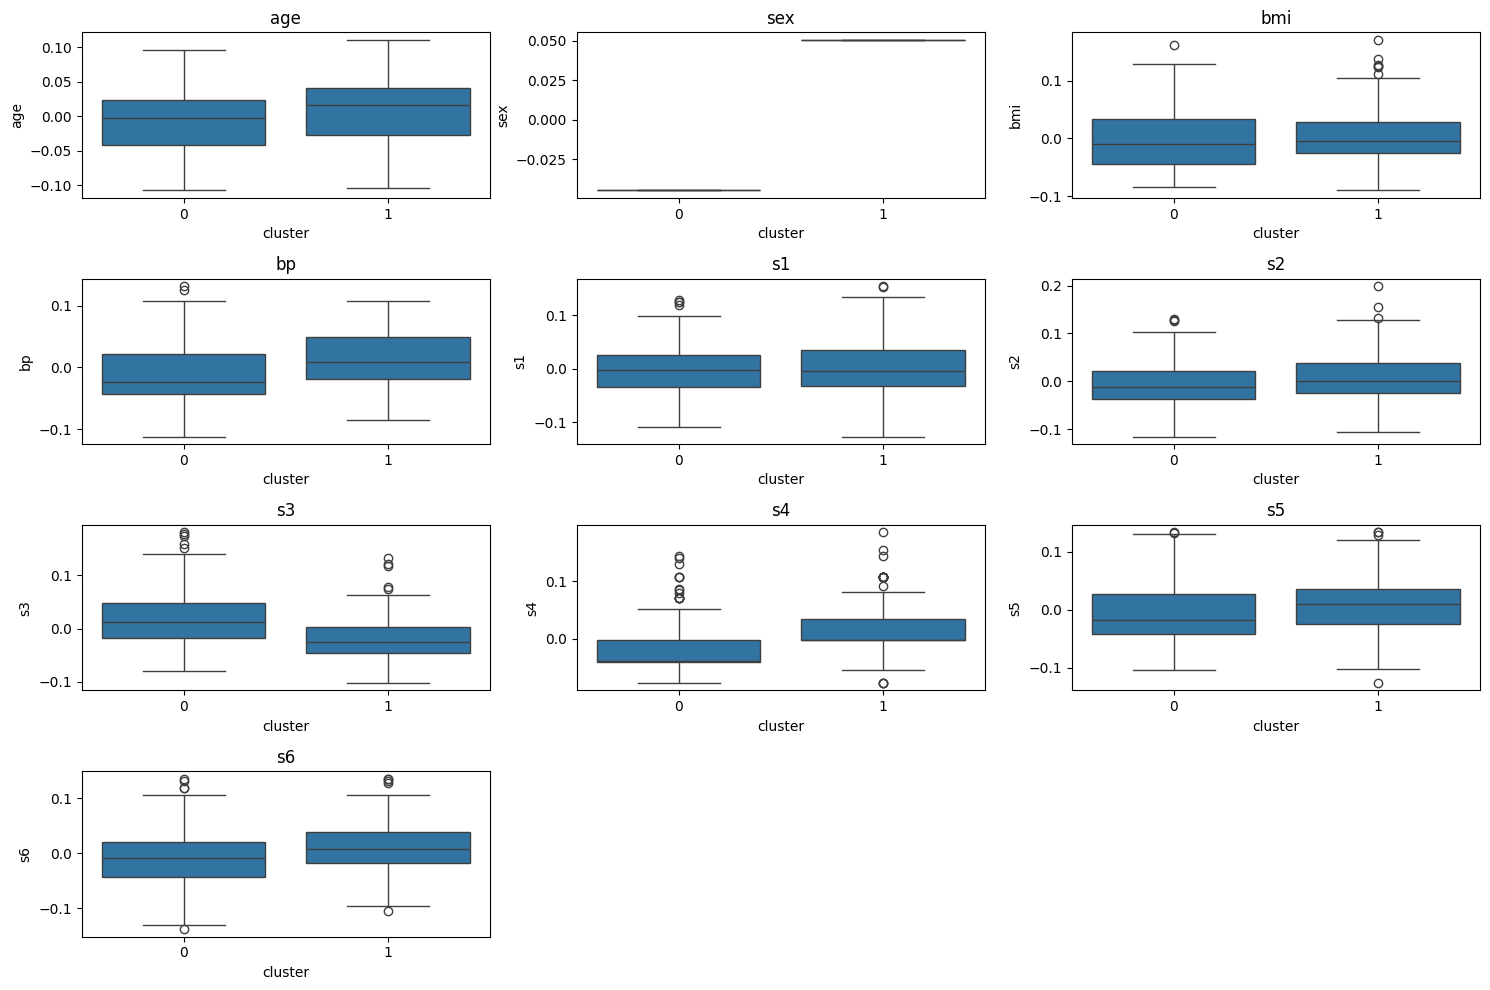

In [181]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:-1]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(column)
plt.tight_layout()
plt.show()

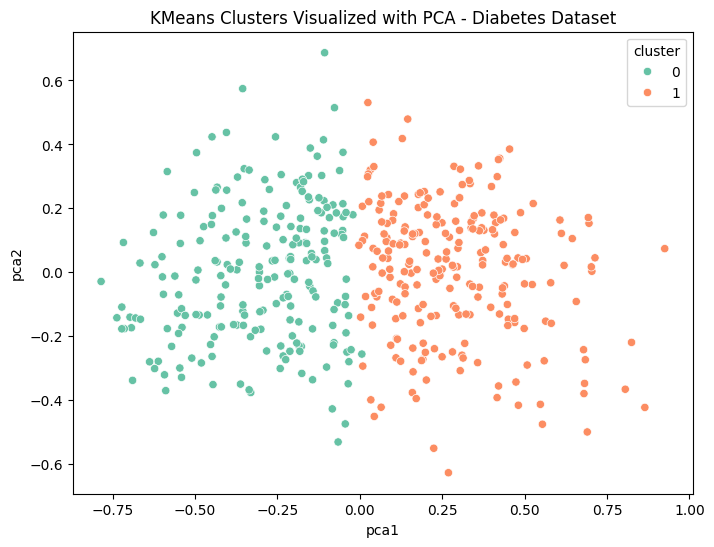

In [192]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('KMeans Clusters Visualized with PCA - Diabetes Dataset')
plt.show()

## california_housing

In [117]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names).drop(columns=["Latitude", "Longitude"])

In [118]:
print(data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [119]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

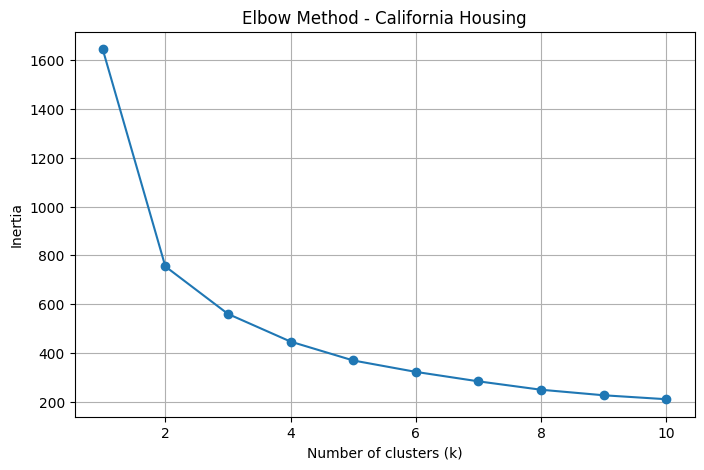

In [120]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - California Housing')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [130]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [131]:
clusters = kmeans.predict(X_scaled)
X['cluster'] = clusters

In [132]:
X.groupby('cluster').mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,pca1,pca2
cluster,,,,,,,,
0,3.451801,45.911489,4.911635,1.058448,1029.391323,3.295867,0.340093,0.000683
1,3.837871,31.078159,5.281443,1.075519,1327.521405,3.092542,0.047914,0.001900
2,4.171372,14.950817,5.927476,1.145677,1789.281744,2.903932,-0.269411,-0.002682


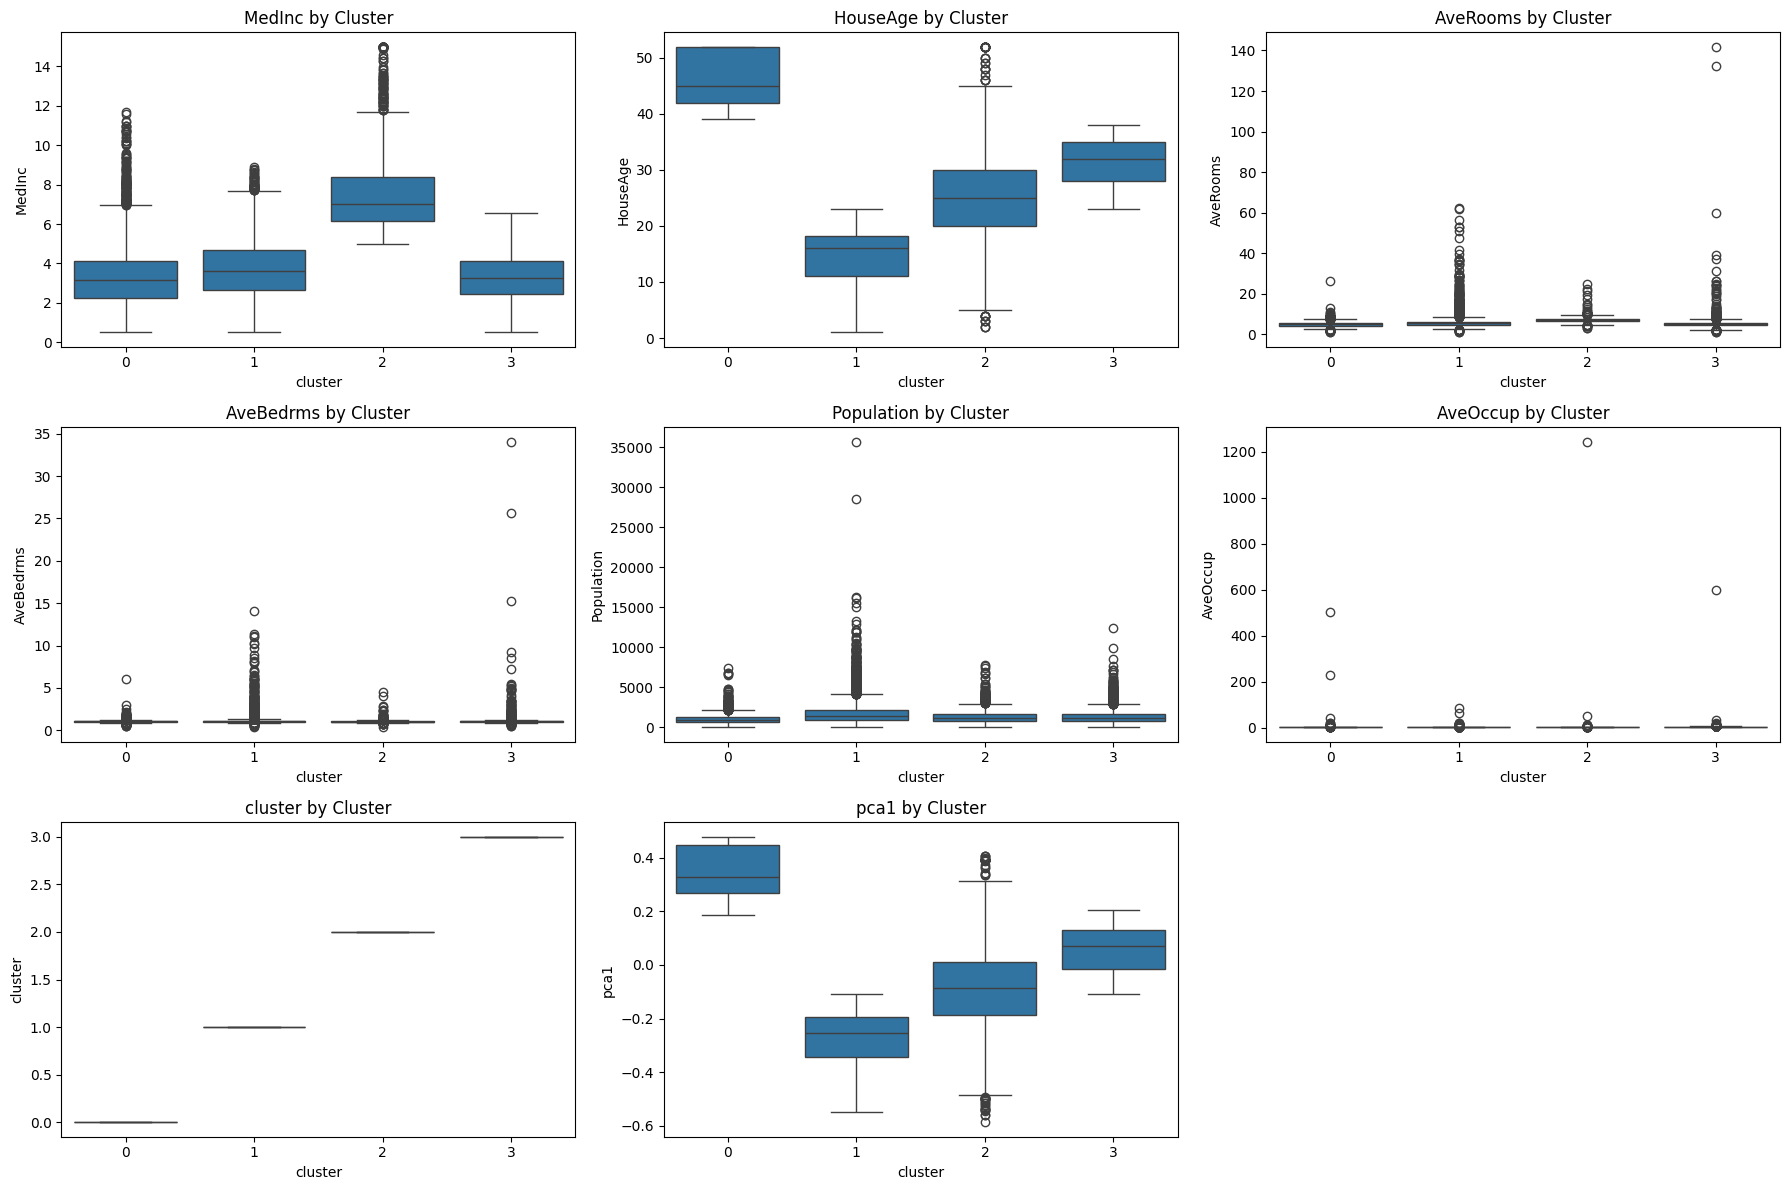

In [129]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(X.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

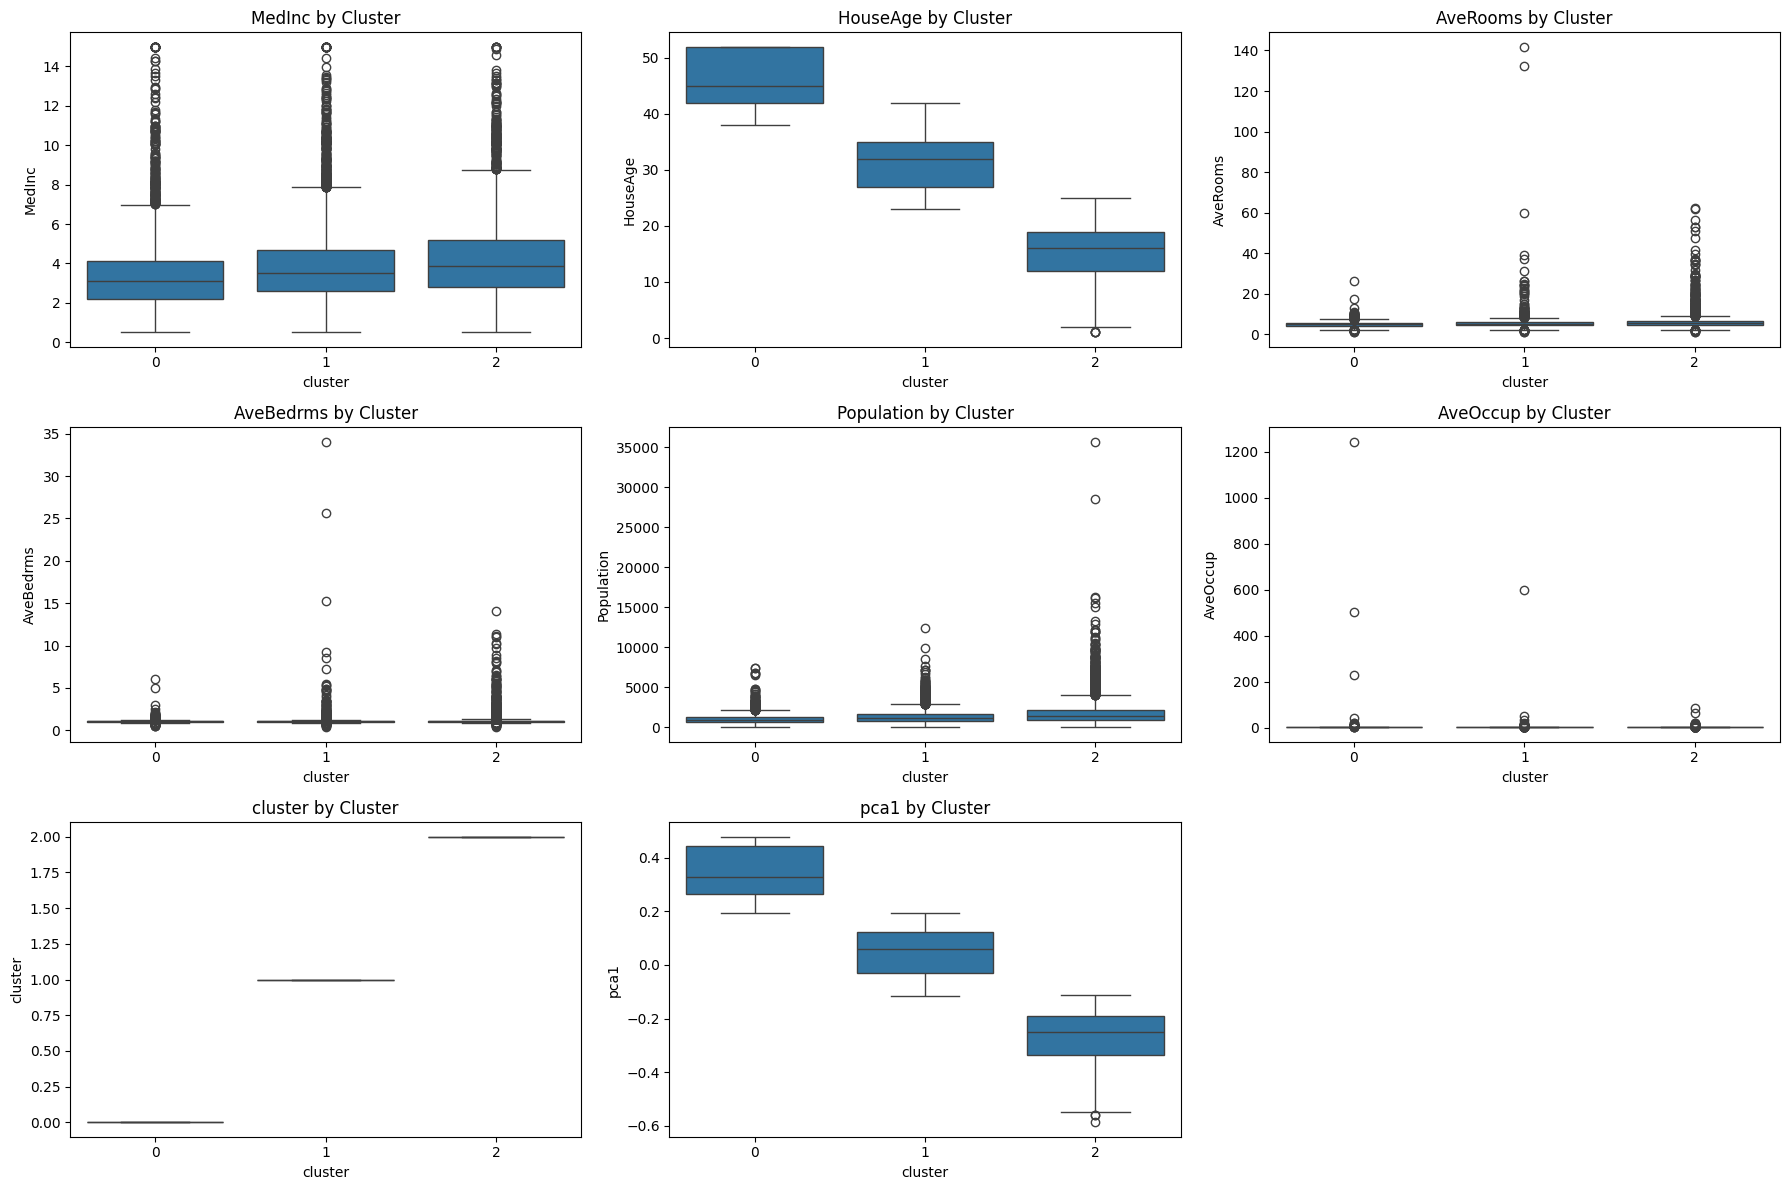

In [133]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(X.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='cluster', y=column, data=X)
    plt.title(f'{column} by Cluster')
plt.tight_layout()
plt.show()

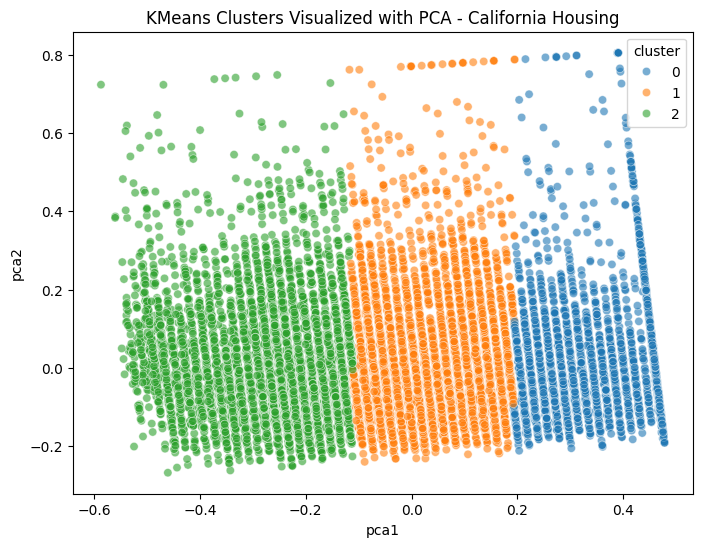

In [125]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X['pca1'] = X_pca[:, 0]
X['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='pca1', y='pca2', hue='cluster', palette='tab10', alpha=0.6)
plt.title('KMeans Clusters Visualized with PCA - California Housing')
plt.show()